In [34]:
%load_ext autoreload
%autoreload 2 

import pandas as pd

import utils

import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings('ignore', category = FutureWarning)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 1. Get Data

In [35]:
data = pd.read_csv('starbucks_data.csv')
data = data[data['Promotion'] == 'Yes']

num_features = ['V2', 'V3']
cat_features = ['V1', 'V4', 'V5', 'V6', 'V7']
target_name = 'purchase'

# 2. Visualization

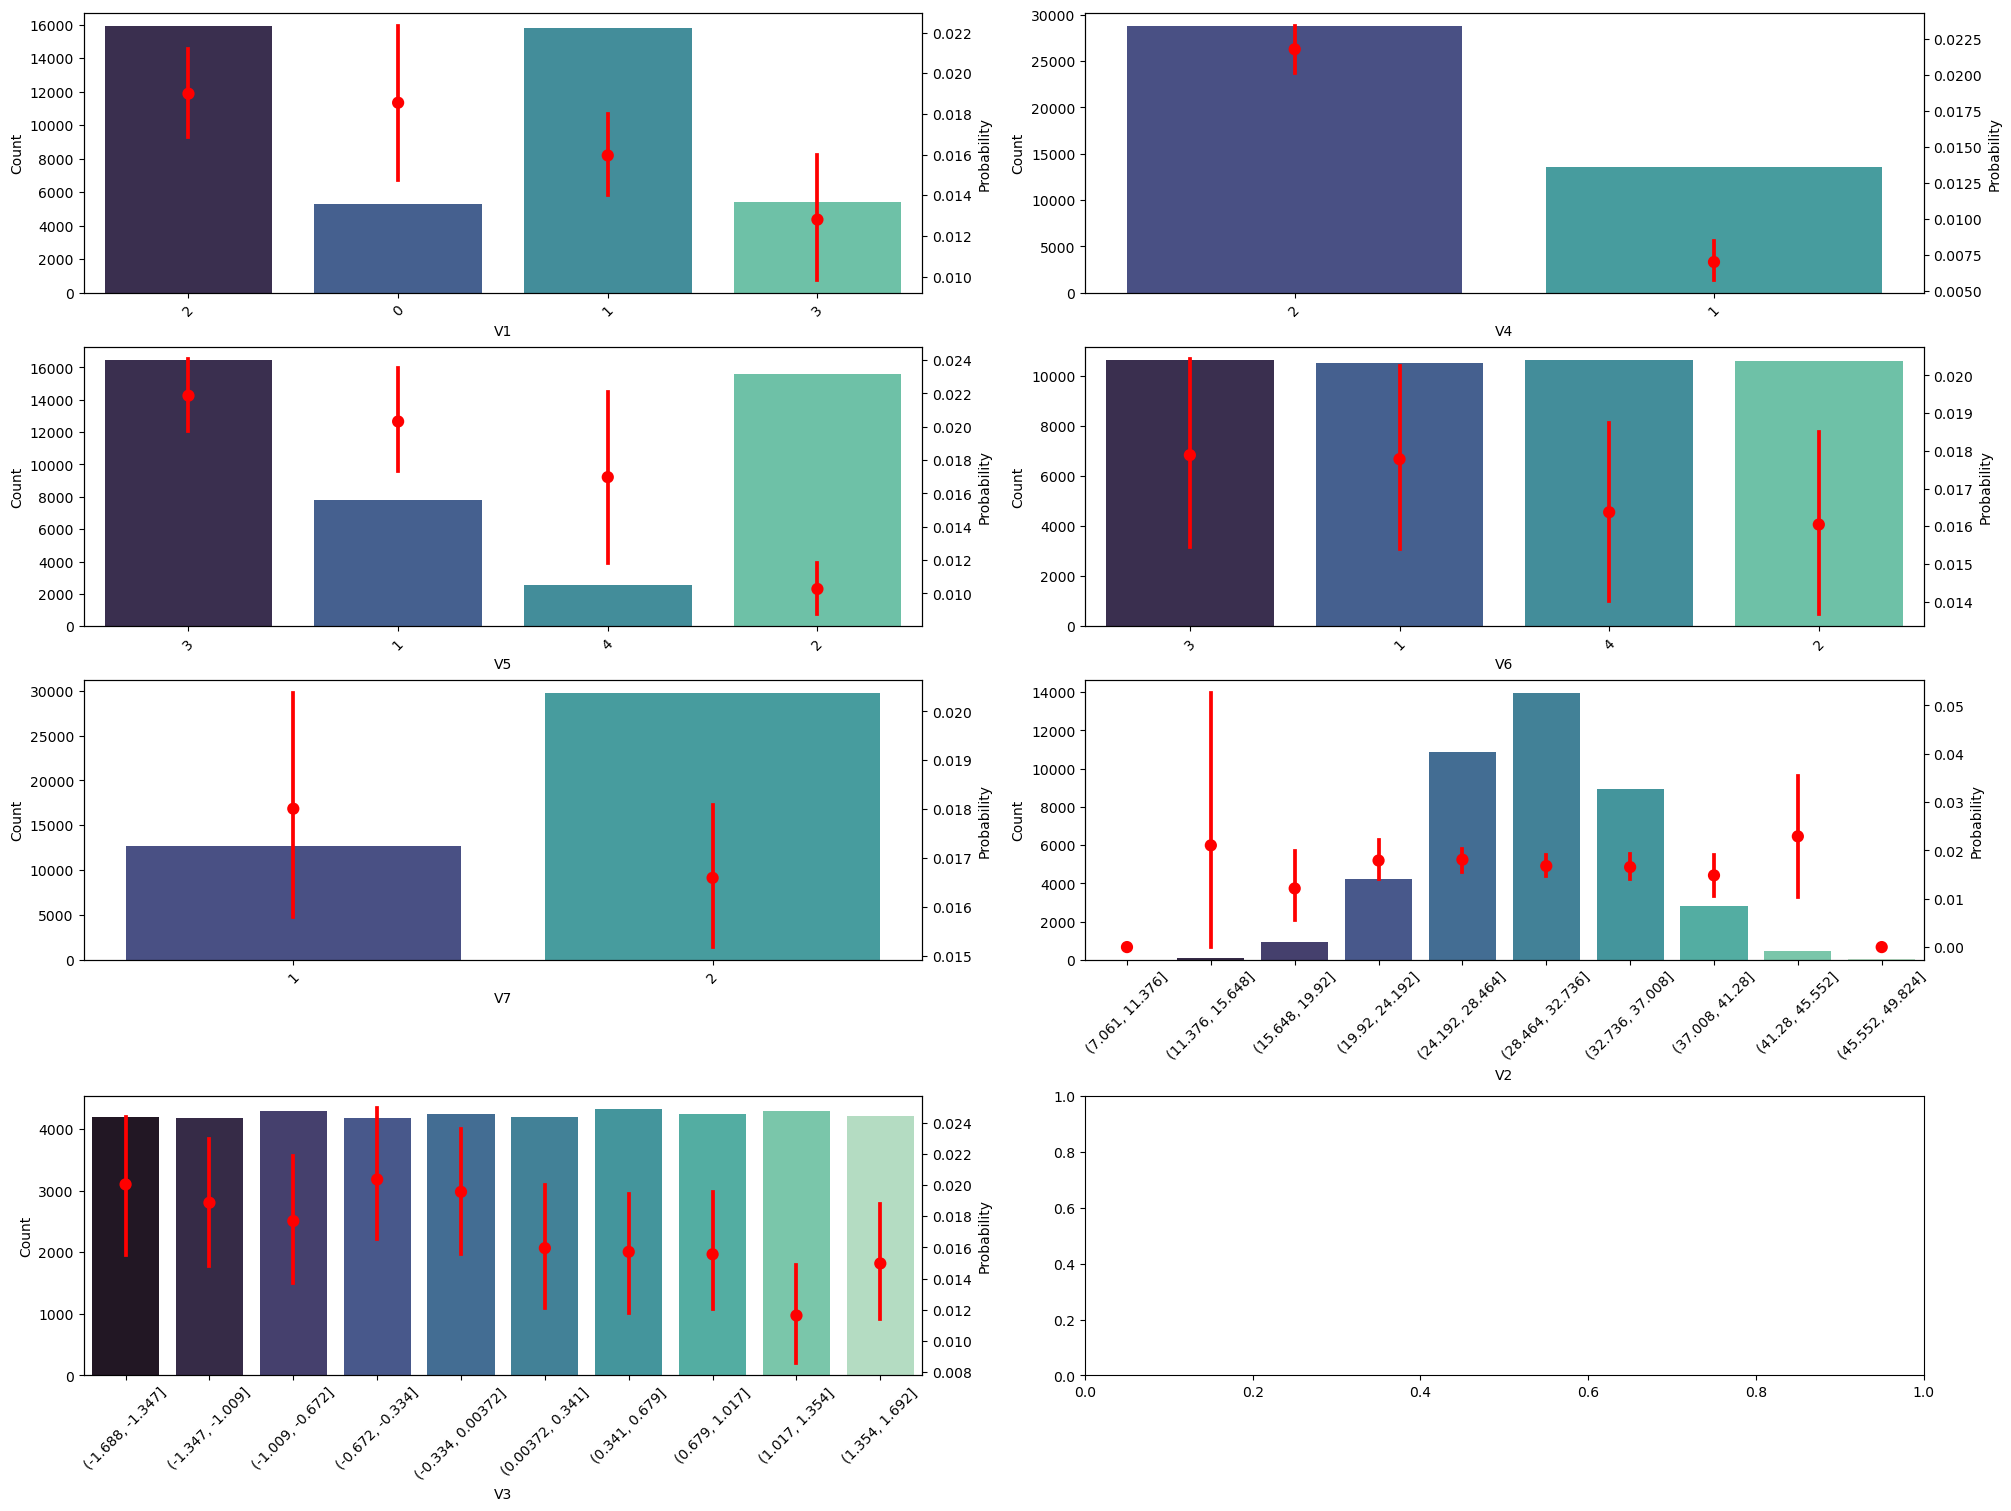

In [36]:
eda_viz = utils.EDAViz(data,
                       target_field=target_name,
                       num_fields=num_features,
                       cat_fields=cat_features)
eda_viz.plot_grid(ncols=2, 
                  subset=cat_features + num_features,                  
                  figsize=(20, 15))

# 3. Feature importance - Information Value

In [37]:
x, y = {}, {}

(x['train'], x['val'], x['test'],
 y['train'], y['val'], y['test']) = utils.train_test_val_split(data,
                                                               target_name=target_name,
                                                               num_features=num_features,
                                                               cat_features=cat_features,
                                                               random_state=42)

In [38]:
# This is simplified version just for the demo 
# Using optbinning would be much more practical

n_bins = 10
ivs = {}

for group in x.keys():    
    ivs[group] = {}
    
    for feat in cat_features + num_features:
        
        if feat in cat_features:
            binned_feat =  x[group][feat]
        else:
            binned_feat =  pd.qcut(x[group][feat], n_bins)
            
        ivs[group][feat] = utils.feature_iv(feature=binned_feat,
                                            target=y[group]
                                            ) 
               
ivs = pd.DataFrame.from_dict(ivs).sort_values('train', ascending= False)
ivs
      

,train,val,test
V4,0.223573,0.183774,0.260843
V5,0.144643,0.079063,0.094413
V3,0.035223,0.069230,0.163291
V2,0.024418,0.064363,0.184850
V1,0.012285,0.005241,0.078433
V6,0.009983,0.000198,0.014393
V7,0.000039,0.025778,0.002084
